In [0]:
# SVR Support Vector Regression
# based on liblinear
# class sklearn.svm.LinearSVR()

In [0]:
# Lib preparation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection, svm

In [0]:
# diabetes dataset extraction, for regression problem
# diabetes dataset, 442 samples, 10 features(all numeric floats), the label is between integer 25 ~ 346

def load_data_regression():
  diabetes = datasets.load_diabetes()
  return model_selection.train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
# iris dataset, for classification problem
# 150 dps, 3 classes, 4 features
# we use stratified sampling here, since samples ordered by y_train, the first 50 samples are of label 0 and the later 50 are of label 1
def load_data_classification():
  iris = datasets.load_iris()
  return model_selection.train_test_split(iris.data, iris.target, test_size=.25, random_state=0, stratify=iris.target)

In [0]:
# sklearn.svm.LinearSVR()
## Params
# C: penalty
# loss: string could be 'epsilon_insensitive', the loss is standard loss L epsilon; or 'squared_epsilon_insensitive, now the loss is squared L epsilon
# dual: True to solve dual problem, False solve original problem. When n_samples > n_features, use False
# tol: float, threshold to quit iterations
# fit_intercept: boolean, True then compute intercept otherwise ignore intercept
# intercept_scaling: float, if given, the instance x will be changed into [X, intercept_scaling], which is equal to adding a feature
# verbose: integer for beginning verbose output
# random_state: integer or RandomState instance or None
# max_iter: a integer, the max times of iteration

## Attributes
# coef_: [n_class-1, n_features], the coefficient of each feature on orginal problem, it only works at linear kernel
# intercept_: array for intercept, as constant one in decision func
# 
## Methods
# fit(X,y)
# predict(X)
# score(X,y), score = 1 - sum of (predicted_val - real_val)^2  /  (real_val - mean_val)^2. Total socre could be (-infinite, 1), the bigger the better but negative means terrible

In [0]:

# test LinearSVR, general test
def test_LinearSVR(*data):
  X_train, X_test, y_train, y_test = data
  regr = svm.LinearSVR()
  regr.fit(X_train, y_train)
  print('Coef:%s, intercept %s'%(regr.coef_,regr.intercept_))
  print('Score:%.2f'%regr.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_LinearSVR(X_train, X_test, y_train, y_test)# score is negative, that's terrible

Coef:[ 2.14940259  0.4418875   6.35258779  4.62352733  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812747  4.33778867], intercept [99.]
Score:-0.56


In [0]:
# consider loss
def test_LinearSVR_loss(*data):
  X_train, X_test, y_train, y_test = data
  losses = ['epsilon_insensitive','squared_epsilon_insensitive']
  for loss in losses:
    regr = svm.LinearSVR(loss=loss)
    regr.fit(X_train, y_train)
    print("loss:%s"%loss)
    print('Coef:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score:%.2f'%regr.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_LinearSVR_loss(X_train, X_test, y_train, y_test)# change loss methods did not give a good score as well, but 0.38 is far better than -0.56

loss:epsilon_insensitive
Coef:[ 2.14940259  0.4418875   6.35258779  4.62352733  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812747  4.33778867], intercept [99.]
Score:-0.56
loss:squared_epsilon_insensitive
Coef:[   7.05204926 -103.32322411  395.67405017  221.76105125  -11.08015192
  -63.55667537 -176.67604715  117.56154356  322.62833536   95.61668643], intercept [152.3704352]
Score:0.38


In [0]:
# now, test the impact from epsilon
def test_linearSVR_epsilon(*data):
  X_train, X_test, y_train, y_test = data
  epsilons=np.logspace(-2,2)
  train_scores=[]
  test_scores=[]
  for epsilon in epsilons:
    regr = svm.LinearSVR(epsilon=epsilon,loss='squared_epsilon_insensitive')
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  fig = plt.figure()
  ax=fig.add_subplot(1,1,1)
  ax.plot(epsilons, train_scores, label='Training_score', marker='+')
  ax.plot(epsilons, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'$\epsilon$')
  ax.set_ylabel('score')
  ax.set_ylim(-1,1.05)
  ax.set_title('LinearSVR_epsilon')
  ax.legend(loc='best',framealpha=.5)
  plt.show()

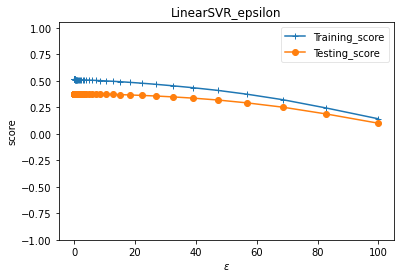

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_linearSVR_epsilon(X_train, X_test, y_train, y_test)# epsilon increases, the score decreases

In [0]:
# finally consider the impact from C
def test_linearSVR_C(*data):
  X_train, X_test, y_train, y_test = data
  Cs = np.logspace(-1,2)
  train_scores=[]
  test_scores=[]
  for C in Cs:
    regr = svm.LinearSVR(epsilon=.1,loss='squared_epsilon_insensitive', C=C)
    regr.fit(X_train, y_train)
    train_scores.append(regr.score(X_train, y_train))
    test_scores.append(regr.score(X_test,y_test))
  fig = plt.figure()
  ax=fig.add_subplot(1,1,1)
  ax.plot(Cs, train_scores, label='Training_score', marker='+')
  ax.plot(Cs, test_scores, label='Testing_score', marker='o')
  ax.set_xlabel(r'C')
  ax.set_xscale('log')
  ax.set_ylabel('score')
  ax.set_ylim(-1,1.05)
  ax.set_title('LinearSVR_C')
  ax.legend(loc='best',framealpha=.5)
  plt.show()

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, in

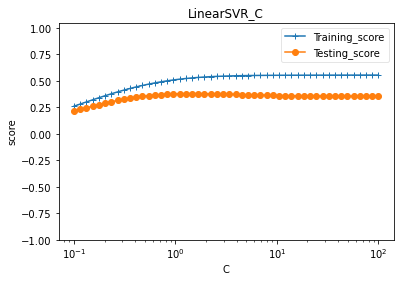

In [0]:
X_train, X_test, y_train, y_test = load_data_regression()
test_linearSVR_C(X_train, X_test, y_train, y_test)# focus more on misclassification(have higher C) can give you good prediction